In [ ]:
!unzip archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/used_car_dataset.csv')
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [4]:
df1 = df.copy()
df1['car_name'] = df['car_name'].apply(lambda x : x.split(' ')[0])

In [5]:
df1.drop(['city'],axis=1, inplace=True)

In [6]:
def convert(x):
      if ',' in x:
        s =  x.split(' ')[1].split(',')
        return float(s[0] + s[1])
      else:
        value = float(x.split(' ')[1])
        return value * 100000  #To convert to lakhs

In [7]:
df2 = df1.copy()
df2['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert)

In [8]:
df2.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402 km",Petrol,2016
1,Maruti,293000.0,"10,344 km",Petrol,2019
2,Tata,2249000.0,"12,999 km",Diesel,2021
3,Maruti,695000.0,"45,000 km",Petrol,2016
4,Jeep,1200000.0,"11,193 km",Petrol,2019


In [9]:
df3 = df2.copy()
df3['kms_driven'] = df2['kms_driven'].apply(lambda x : x.split(' ')[0])

In [10]:
df3.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402",Petrol,2016
1,Maruti,293000.0,"10,344",Petrol,2019
2,Tata,2249000.0,"12,999",Diesel,2021
3,Maruti,695000.0,"45,000",Petrol,2016
4,Jeep,1200000.0,"11,193",Petrol,2019


In [11]:
df4 = df3.copy()
df4['kms_driven'] = df3['kms_driven'][df3['kms_driven'].str.len() > 4]

In [12]:
def removeComma(x):
    if ',' in x :
        s = x.split(',')
        return float(s[0] + s[1])

In [13]:
df4.kms_driven = df4.kms_driven.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2097 non-null   object 
 3   fuel_type            2105 non-null   object 
 4   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 82.4+ KB


In [14]:
df5 = df3.copy()
df5['kms_driven'] = df3['kms_driven'].apply(removeComma)

In [15]:
df5.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [16]:
filtered_df = df5[df5['car_name'].apply(lambda x: df5['car_name'].value_counts().get(x, 0) > 20)]
filtered_df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [17]:
df_6 = filtered_df[filtered_df.car_price_in_rupees > 100000]

In [18]:
df7 = df_6[df_6.kms_driven > 1000]

In [19]:
df8 = df7[df7['fuel_type'].apply(lambda x: df7['fuel_type'].value_counts().get(x, 0) > 500)]
df8.fuel_type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [20]:
dummies = pd.get_dummies(df8.car_name)
df9 = pd.concat([df8, dummies],axis=1)
dummies_2 = pd.get_dummies(df9.fuel_type)
df10 = pd.concat([df9, dummies_2],axis=1)
df10.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,...,Mahindra,Maruti,Mercedes-Benz,Renault,Skoda,Tata,Toyota,Volkswagen,Diesel,Petrol
0,Hyundai,445000.0,22402.0,Petrol,2016,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,Maruti,293000.0,10344.0,Petrol,2019,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,Tata,2249000.0,12999.0,Diesel,2021,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,Maruti,695000.0,45000.0,Petrol,2016,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,Jeep,1200000.0,11193.0,Petrol,2019,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [21]:
df10.drop(['car_name','fuel_type'], axis=1, inplace=True)

In [22]:
X = df10.drop('car_price_in_rupees',axis=1)
y = df10.car_price_in_rupees

In [23]:
X.head()

,kms_driven,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,Jeep,Kia,MG,Mahindra,Maruti,Mercedes-Benz,Renault,Skoda,Tata,Toyota,Volkswagen,Diesel,Petrol
0,22402.0,2016,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,10344.0,2019,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,12999.0,2021,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,45000.0,2016,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,11193.0,2019,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [26]:
model = LinearRegression()
model.fit(X_train.values,y_train)
model.score(X_test.values,y_test)

0.6764392883950421

In [27]:
model = DecisionTreeRegressor()
model.fit(X_train.values,y_train)
model.score(X_test.values,y_test)

0.6090073691318452

In [28]:
model = RandomForestRegressor()
model.fit(X_train.values,y_train)
model.score(X_test.values,y_test)

0.7803555170819092

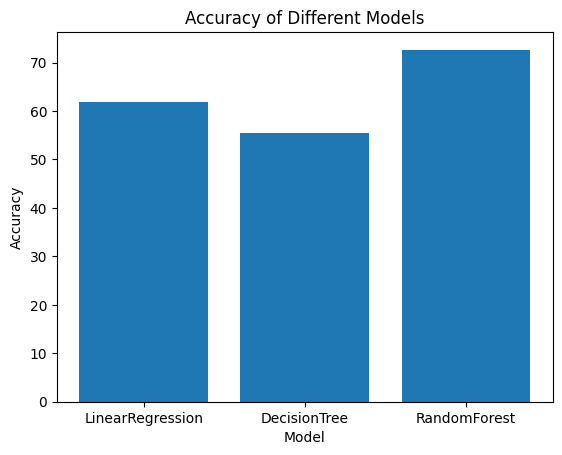

In [29]:
import matplotlib.pyplot as  plt
models = ['LinearRegression', 'DecisionTree', 'RandomForest']
accuracy = [61.95, 55.44,72.65]

plt.bar(models, accuracy)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')


plt.show()